<a href="https://colab.research.google.com/github/wearesach/Others/blob/main/MLP_n_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DONT EDIT

##MLP

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_excel('/content/Features.xls')
data

,0.386365,0.506947,1.037994,0.477057,0.143030,0.151433,0.198694,0.406834,0.186979,0.056060,0.488391,1.062654,0.000000
0,1.119869,0.661191,1.229951,0.638143,0.184976,0.292079,0.172449,0.320790,0.166437,0.048245,0.537575,1.036118,0
1,0.331309,0.403970,0.804980,0.457886,0.118490,0.156526,0.190855,0.380311,0.216327,0.055981,0.501839,0.882251,0
2,0.695721,0.356682,0.589830,0.370621,0.093518,0.330293,0.169335,0.280022,0.175952,0.044398,0.604720,0.962391,0
3,0.770948,0.481618,0.811748,0.455343,0.123653,0.291660,0.182203,0.307095,0.172262,0.046780,0.593309,1.057703,0
4,0.460745,0.454580,0.780062,0.468657,0.124192,0.201354,0.198659,0.340901,0.204812,0.054274,0.582748,0.969962,0


In [ ]:
data.set_axis(['C0', 'C1', 'C2', 'C3', 'C4','C01', 'C11', 'C21', 'C31', 'C41','c02','c12','class'], axis=1,inplace=True)

In [ ]:
data

,C0,C1,C2,C3,C4,C01,C11,C21,C31,C41,c02,c12,class
0,1.119869,0.661191,1.229951,0.638143,0.184976,0.292079,0.172449,0.320790,0.166437,0.048245,0.537575,1.036118,0
1,0.331309,0.403970,0.804980,0.457886,0.118490,0.156526,0.190855,0.380311,0.216327,0.055981,0.501839,0.882251,0
2,0.695721,0.356682,0.589830,0.370621,0.093518,0.330293,0.169335,0.280022,0.175952,0.044398,0.604720,0.962391,0
3,0.770948,0.481618,0.811748,0.455343,0.123653,0.291660,0.182203,0.307095,0.172262,0.046780,0.593309,1.057703,0
4,0.460745,0.454580,0.780062,0.468657,0.124192,0.201354,0.198659,0.340901,0.204812,0.054274,0.582748,0.969962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,0.460214,0.722615,1.372001,0.687650,0.185466,0.134253,0.210801,0.400240,0.200601,0.054104,0.526687,1.050846,1
1535,0.461289,0.681099,1.290583,0.619741,0.188710,0.142311,0.210123,0.398153,0.191194,0.058218,0.527745,1.099005,1
1536,0.306662,0.481251,0.862090,0.415890,0.136616,0.139233,0.218501,0.391413,0.188825,0.062027,0.558238,1.157161,1
1537,0.592892,0.472343,0.970868,0.459915,0.138298,0.225065,0.179304,0.368547,0.174586,0.052499,0.486516,1.027022,1


In [ ]:
data.info()  #presence of object(string)   # null value not needed    # id not needed

In [ ]:
data.isnull().sum()

In [ ]:
X = data.drop(['class'],axis = 'columns')
X
#X = iris.data[:, :2] 

In [ ]:
y = data.drop(['C0', 'C1', 'C2', 'C3', 'C4','C01', 'C11', 'C21', 'C31', 'C41','c02','c12'],axis = 'columns')
y

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
np.random.seed(100)
w= np.random.random((12,1))
w

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_test)

308

In [ ]:
X_train.shape[0]

1231

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(128, input_dim=12))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
import tensorflow as tf
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,),metrics=['accuracy','mse'])

In [ ]:
model.fit(X_train, y_train,epochs=500, verbose=1)

Epoch 1/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9326 - mse: 0.0504
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9415 - mse: 0.0478
Epoch 3/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9342 - mse: 0.0482
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9326 - mse: 0.0504
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9350 - mse: 0.0497
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9399 - mse: 0.0481
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9334 - mse: 0.0502
Epoch 8/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9399 - mse: 0.0470
Epoch 9/200
39/39 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.93

In [ ]:
preds = model.predict(X_test)
y_pred = [1 if i>=0.5 else 0 for i in preds]

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_test,y_pred)
cm

array([[152,   0],
       [ 13, 143]])

##SVM

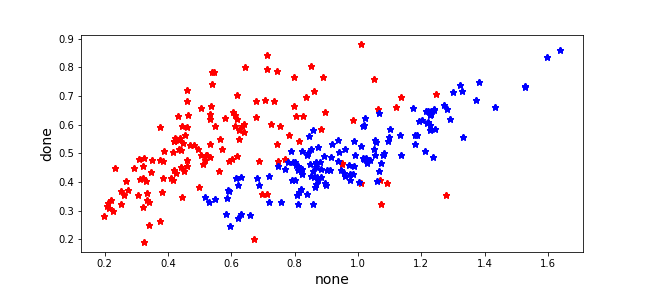

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
plt.figure(figsize=(9,4))  #width , heigth
plt.xlabel("none",fontsize= 14)
plt.ylabel("done",fontsize= 14)
plt.scatter (data['C0'],data['C1'],color = 'red', marker = '*')
plt.scatter (data['C2'],data['C3'],color = 'blue', marker = '*')
plt.savefig("graph.png")  #to save the file 
I = cv2.imread('/content/graph.png')
cv2_imshow(I)

In [ ]:
X = data.iloc[:,:12] 

y = data.iloc[:,12] 

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',tol=0.00001, gamma=100,verbose=2)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=2)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7077922077922078


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       152
           1       0.70      0.74      0.72       156

    accuracy                           0.71       308
   macro avg       0.71      0.71      0.71       308
weighted avg       0.71      0.71      0.71       308



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[103,  49],
       [ 41, 115]])